In [1]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# 캐글에서 파일 불러오기 

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bananapple","key":"75eb3c0872d58bbdaf9df31824376852"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!kaggle datasets download -d gmlmrinalini/manwomandetection

 82% 113M/138M [00:03<00:01, 23.2MB/s]
100% 138M/138M [00:03<00:00, 38.7MB/s]


In [6]:
#압축풀기
import zipfile

local_zip = '/content/manwomandetection.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

# directory 지정

In [7]:
#기본 경로지정

base_dir='/content/dataset' #기본 주소

train_dir=os.path.join(base_dir,'train')#train의 주소는 기본 주소에 train이라고 적혀있는 파일에 접근해라
test_dir=os.path.join(base_dir,'test')#test의 주소는 기본 주소에 test라고 적혀있는 파일에 접근해라

In [8]:
#훈련에 사용되는 사람 이미지 경로
train_man_dir=os.path.join(train_dir,'man')#위에 훈련용 경로에 접근을 해서 man이라는 파일에 접근해라
train_woman_dir=os.path.join(train_dir,'woman')#train폴더내에 woman 폴더에 접근하라
print(train_man_dir,'\n',train_woman_dir)

#test용 이미지 경로
test_man_dir=os.path.join(test_dir,'man')
test_woman_dir=os.path.join(test_dir,'woman')
print(test_man_dir,'\n',test_woman_dir)
#os.path.join(ㅇㅇㅇ,ㅁㅁㅁ)는 ㅇㅇㅇ=주소 ㅁㅁㅁ=주소 두개를 합쳐주는 역할이다. 
#즉 ㅇㅇㅇ의 주소에 접근해서 ㅁㅁㅁ라는 이름이 있으면 거기에 접근해라


#폴더명에 맞춰서 이미지를 저장하는 이유는 이미지를 불러올 때 폴더명에 맞춰서 자동으로 labelling하는 flow_from_directory( ) 함수의 기능을 활용하기 위함이다.

/content/dataset/train/man 
 /content/dataset/train/woman
/content/dataset/test/man 
 /content/dataset/test/woman


In [9]:
#데이터 살펴보기

In [10]:
train_man_fnames=os.listdir(train_man_dir)#os.listdir 리스트로 변환해줌
train_woman_fnames=os.listdir(train_woman_dir)

print(train_man_fnames[:5],'\n',train_woman_fnames[:5])
#list형태 

#test
test_man_fnames=os.listdir(test_man_dir)#os.listdir 리스트로 변환해줌
test_woman_fnames=os.listdir(test_woman_dir)

['face_1303.jpg', 'face_1213.jpg', 'face_1140.jpg', 'face_720.jpg', 'face_1288.jpg'] 
 ['face_1213.jpg', 'face_1140.jpg', 'face_720.jpg', 'face_1288.jpg', 'face_954.jpg']


In [11]:
#위에 변경한 데이터 타입 확인해보기
type(train_man_fnames)

list

In [12]:
#각각의 파일에 몇개의 데이터가 있는지 확인해보기

print('train man {}'.format(len(train_man_fnames)))
print('train woman {}'.format(len(train_woman_fnames)))
#test
print('train man {}'.format(len(test_man_fnames)))
print('train woman {}'.format(len(test_woman_fnames)))

#즉 리스트에 담는 이유는 데이터가 몇개있는지 확인하기 위함이다.

train man 821
train woman 794
train man 176
train woman 170


# 시각화

In [ ]:
pic_index=8

next_cat_pix = [os.path.join(train_man_dir, fname)
                for fname in train_man_fnames[ :8]]

next_dog_pix = [os.path.join(train_woman_dir, fname)
                for fname in train_woman_fnames[ :8]]

In [ ]:
len(next_cat_pix)

8

In [ ]:
next_cat_pix[0]

'/content/dataset/train/man/face_964.jpg'

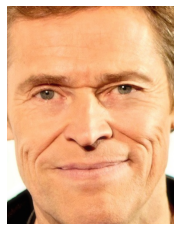

In [ ]:
img = mpimg.imread(next_cat_pix[0])
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
len(next_dog_pix)

8

In [ ]:
next_cat_pix+next_dog_pix

['/content/dataset/train/man/face_964.jpg',
 '/content/dataset/train/man/face_1490.jpg',
 '/content/dataset/train/man/face_552.jpg',
 '/content/dataset/train/man/face_484.jpg',
 '/content/dataset/train/man/face_1256.jpg',
 '/content/dataset/train/man/face_783.jpg',
 '/content/dataset/train/man/face_1093.jpg',
 '/content/dataset/train/man/face_1306.jpg',
 '/content/dataset/train/woman/face_964.jpg',
 '/content/dataset/train/woman/face_825.jpg',
 '/content/dataset/train/woman/face_622.jpg',
 '/content/dataset/train/woman/face_484.jpg',
 '/content/dataset/train/woman/face_1256.jpg',
 '/content/dataset/train/woman/face_783.jpg',
 '/content/dataset/train/woman/face_779.jpg',
 '/content/dataset/train/woman/face_1093.jpg']

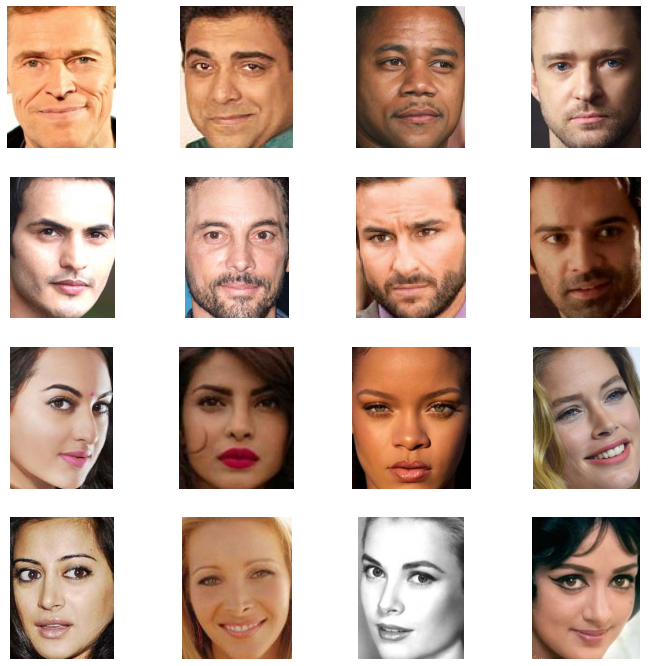

In [ ]:
#시각화
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


fig = plt.gcf()
fig.set_size_inches(4*3, 4*3)

next_cat_pix = [os.path.join(train_man_dir, fname)
                for fname in train_man_fnames[ :8]]

next_dog_pix = [os.path.join(train_woman_dir, fname)
                for fname in train_woman_fnames[ :8]]


for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 데이터셋/전처리 

In [13]:
bacth=30
img_height=150
img_width=150

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.2,
                                 zoom_range=0.4,
                                 horizontal_flip=True,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 fill_mode='nearest'
                                 )
test_datagen=ImageDataGenerator(rescale=1.0/255, 
                                rotation_range=30, 
                                shear_range=0.2, 
                                zoom_range=0.4, 
                                horizontal_flip=True,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                fill_mode='nearest'
                                )

#배치사이즈를 총 4가지로 해보기
batch_list=[32,64]
train_gen_list=[]
test_gen_list=[]

for batch_ in batch_list:
  train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=batch_,
                                                 class_mode='binary',
                                                 target_size=(img_height,img_width),
                                                 )
  train_gen_list.append(train_generator)
  test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=batch_,
                                                class_mode='binary',
                                                target_size=(img_height,img_width)
                                                      )
  test_gen_list.append(test_generator)

Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


In [ ]:
# ImageDataGenerator 클래스의 rescale 파라미터의 값을 1.0/255로 지정하면 모든 값을 255로 나누게 됩니다.

# rotation_range는 이미지를 임의로 회전시키는 각도를 지정합니다. 0~180 사이의 값을 입력합니다.

# width_shift, height_shift는 이미지를 임의로 수직 또는 수평 방향으로 이동시키는 범위를 지정합니다. 이미지의 너비 또는 높이에 대한 비율로 지정합니다.

# shear_range는 전단변환 (shearing transformation)을 위한 파라미터입니다. 이미지를 어긋나 보이도록 변환합니다.

# zoom_range는 이미지를 임의로 확대하는 정도를 지정합니다.

# horizontal_flip은 이미지를 임의로 (수평 방향으로) 뒤집을지 여부를 결정합니다.

# fill_mode는 회전 또는 이동 변환 후 빈 픽셀을 채우는 방식을 지정합니다. 디폴트는 ‘nearest’이며, {‘constant’, ‘nearest’, ‘reflect’, ‘wrap’} 중 하나의 값으로 지정합니다.

In [ ]:
test_gen_list

# 모델만들기

In [15]:
import tensorflow as tf

tf.__version__

from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image

In [20]:
from keras.engine.sequential import Sequential
model =tf.keras.models.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)      

# 학습하기

In [22]:
#epochs=5
history1=model.fit(train_gen_list[0], 
                   validation_data=test_gen_list[0],
                   epochs=5
                   )

Epoch 1/5
51/51 [==============================] - 26s 263ms/step - loss: 0.7201 - accuracy: 0.5331 - val_loss: 0.6744 - val_accuracy: 0.5520
Epoch 2/5
51/51 [==============================] - 14s 273ms/step - loss: 0.6174 - accuracy: 0.6718 - val_loss: 0.6380 - val_accuracy: 0.6647
Epoch 3/5
51/51 [==============================] - 13s 256ms/step - loss: 0.5733 - accuracy: 0.6972 - val_loss: 0.5914 - val_accuracy: 0.6908
Epoch 4/5
51/51 [==============================] - 15s 302ms/step - loss: 0.5254 - accuracy: 0.7300 - val_loss: 0.5279 - val_accuracy: 0.7572
Epoch 5/5
51/51 [==============================] - 13s 265ms/step - loss: 0.4971 - accuracy: 0.7554 - val_loss: 0.5030 - val_accuracy: 0.7601


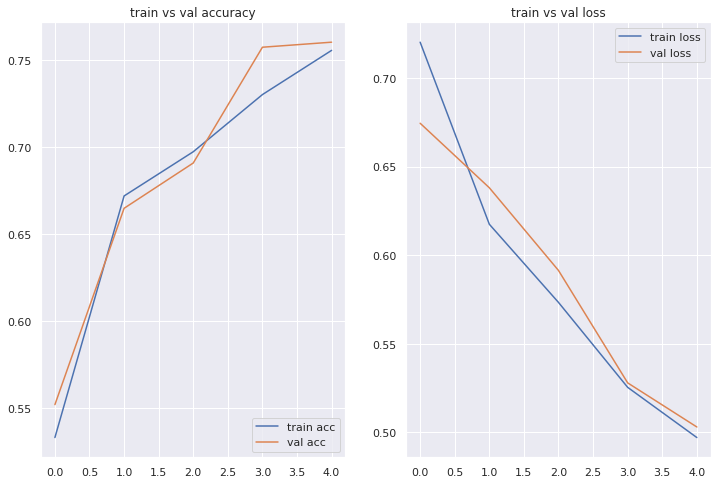

In [24]:
#정확도
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']

#오차 확인
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs_range=range(5)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [26]:
#epochs=5
history2=model.fit(train_gen_list[1],
                   validation_data=test_gen_list[1],
                   epochs=5)

Epoch 1/5
26/26 [==============================] - 14s 510ms/step - loss: 0.4967 - accuracy: 0.7622 - val_loss: 0.4474 - val_accuracy: 0.8092
Epoch 2/5
26/26 [==============================] - 13s 502ms/step - loss: 0.4480 - accuracy: 0.7777 - val_loss: 0.4530 - val_accuracy: 0.7746
Epoch 3/5
26/26 [==============================] - 13s 493ms/step - loss: 0.4286 - accuracy: 0.8006 - val_loss: 0.4027 - val_accuracy: 0.8295
Epoch 4/5
26/26 [==============================] - 13s 495ms/step - loss: 0.4180 - accuracy: 0.8167 - val_loss: 0.4463 - val_accuracy: 0.7977
Epoch 5/5
26/26 [==============================] - 18s 684ms/step - loss: 0.4159 - accuracy: 0.8167 - val_loss: 0.4879 - val_accuracy: 0.7948


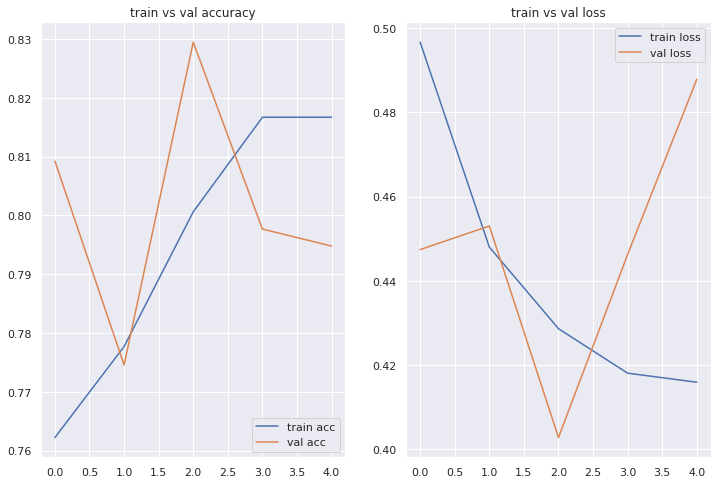

In [28]:
#정확도
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']

#오차 확인
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range=range(5)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [29]:
#epochs=30
history3=model.fit(train_gen_list[0],
                   validation_data=test_gen_list[0],
                   epochs=30)

Epoch 1/30
51/51 [==============================] - 15s 297ms/step - loss: 0.3996 - accuracy: 0.8118 - val_loss: 0.3763 - val_accuracy: 0.8410
Epoch 2/30
51/51 [==============================] - 13s 253ms/step - loss: 0.3710 - accuracy: 0.8310 - val_loss: 0.4273 - val_accuracy: 0.8121
Epoch 3/30
51/51 [==============================] - 13s 254ms/step - loss: 0.3992 - accuracy: 0.8142 - val_loss: 0.4384 - val_accuracy: 0.7919
Epoch 4/30
51/51 [==============================] - 13s 251ms/step - loss: 0.4105 - accuracy: 0.8149 - val_loss: 0.4202 - val_accuracy: 0.8150
Epoch 5/30
51/51 [==============================] - 13s 252ms/step - loss: 0.3848 - accuracy: 0.8260 - val_loss: 0.4103 - val_accuracy: 0.8555
Epoch 6/30
51/51 [==============================] - 17s 337ms/step - loss: 0.3510 - accuracy: 0.8372 - val_loss: 0.4098 - val_accuracy: 0.8150
Epoch 7/30
51/51 [==============================] - 13s 262ms/step - loss: 0.3372 - accuracy: 0.8421 - val_loss: 0.4744 - val_accuracy: 0.8006

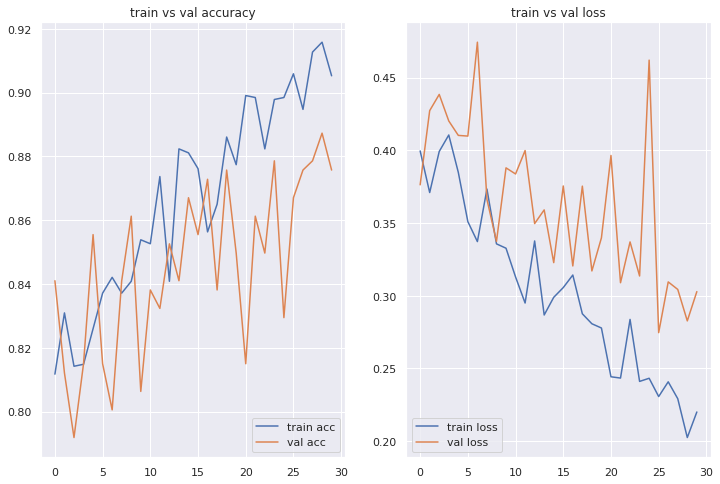

In [30]:
#정확도
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']

#오차 확인
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs_range=range(30)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [23]:
#epochs=30
history3=model.fit(train_gen_list[1],
                   validation_data=test_gen_list[1],
                   epochs=30)

Epoch 1/30
26/26 [==============================] - 14s 493ms/step - loss: 0.7274 - accuracy: 0.5040 - val_loss: 0.6715 - val_accuracy: 0.6387
Epoch 2/30
26/26 [==============================] - 12s 473ms/step - loss: 0.6512 - accuracy: 0.6211 - val_loss: 0.5725 - val_accuracy: 0.6908
Epoch 3/30
26/26 [==============================] - 12s 473ms/step - loss: 0.5612 - accuracy: 0.7146 - val_loss: 0.5160 - val_accuracy: 0.7601
Epoch 4/30
26/26 [==============================] - 14s 537ms/step - loss: 0.5076 - accuracy: 0.7406 - val_loss: 0.4961 - val_accuracy: 0.7572
Epoch 5/30
26/26 [==============================] - 13s 510ms/step - loss: 0.4667 - accuracy: 0.7777 - val_loss: 0.4439 - val_accuracy: 0.8208
Epoch 6/30
26/26 [==============================] - 15s 568ms/step - loss: 0.4593 - accuracy: 0.7963 - val_loss: 0.4270 - val_accuracy: 0.8064
Epoch 7/30
26/26 [==============================] - 12s 471ms/step - loss: 0.4493 - accuracy: 0.7957 - val_loss: 0.4627 - val_accuracy: 0.7832

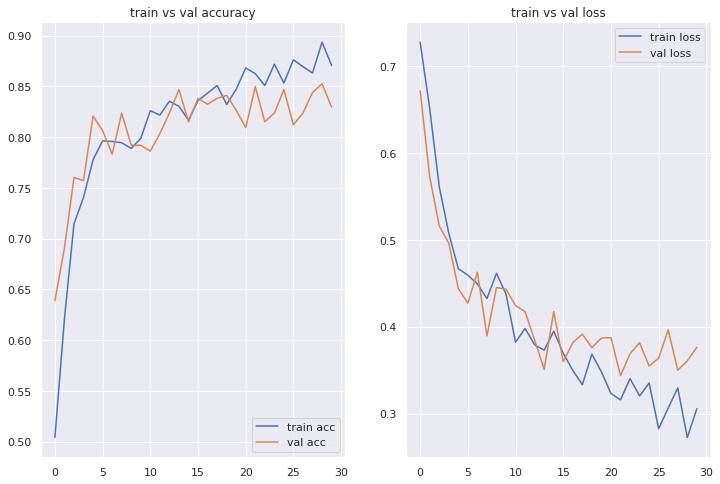

In [25]:
#정확도
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']

#오차 확인
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs_range=range(30)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

# 데이터 증강

In [26]:
#데이터증강해보기
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(150,150,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

In [31]:
model =tf.keras.models.Sequential([
    data_augmentation,
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 64)       

Epoch 1/20
20/20 [==============================] - 8s 341ms/step - loss: 0.7233 - accuracy: 0.5250 - val_loss: 0.6969 - val_accuracy: 0.4844
Epoch 2/20
20/20 [==============================] - 7s 332ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6616 - val_accuracy: 0.6906
Epoch 3/20
20/20 [==============================] - 7s 341ms/step - loss: 0.6363 - accuracy: 0.6656 - val_loss: 0.6418 - val_accuracy: 0.6531
Epoch 4/20
20/20 [==============================] - 7s 336ms/step - loss: 0.6424 - accuracy: 0.6187 - val_loss: 0.6162 - val_accuracy: 0.6875
Epoch 5/20
20/20 [==============================] - 7s 331ms/step - loss: 0.6106 - accuracy: 0.6806 - val_loss: 0.5884 - val_accuracy: 0.6969
Epoch 6/20
20/20 [==============================] - 8s 405ms/step - loss: 0.5946 - accuracy: 0.7031 - val_loss: 0.5543 - val_accuracy: 0.7219
Epoch 7/20
20/20 [==============================] - 7s 334ms/step - loss: 0.5692 - accuracy: 0.7014 - val_loss: 0.6145 - val_accuracy: 0.6562
Epoch 

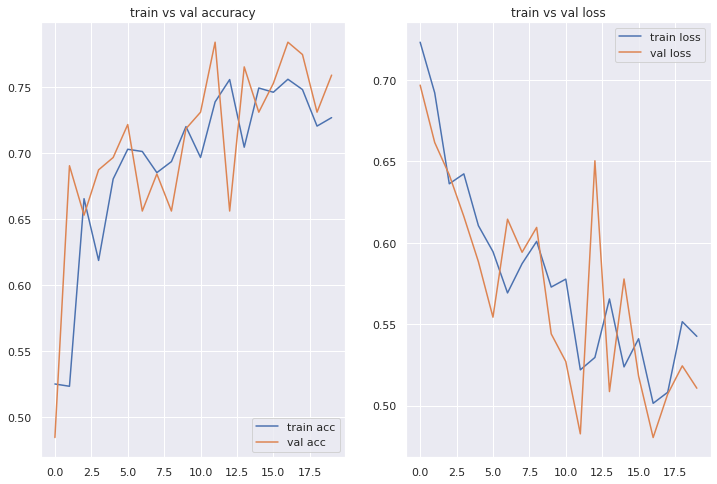

In [30]:
history1_2=model.fit(train_gen_list[0], 
                   validation_data=test_gen_list[0],
                   epochs=20,
                   steps_per_epoch=20,#steps_per_epoch는 한번의 epoch에서 훈련에 사용할 batch의 개수를 지정함 즉 한번 epoch할 때의 batch의 개수
                   validation_steps=10#validation_steps는 한번의 epoch이 끝날 때 테스트에 사용되는 batch의 개수 지정
                   )

#정확도
acc=history1_2.history['accuracy']
val_acc=history1_2.history['val_accuracy']

#오차 확인
loss=history1_2.history['loss']
val_loss=history1_2.history['val_loss']

epochs_range=range(20)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [ ]:
history1_3=model.fit(train_gen_list[0], 
                   validation_data=test_gen_list[0],
                   epochs=30,
                   steps_per_epoch=20,#steps_per_epoch는 한번의 epoch에서 훈련에 사용할 batch의 개수를 지정함 즉 한번 epoch할 때의 batch의 개수
                   validation_steps=10#validation_steps는 한번의 epoch이 끝날 때 테스트에 사용되는 batch의 개수 지정
                   )



Epoch 1/30
20/20 [==============================] - 8s 361ms/step - loss: 0.8827 - accuracy: 0.4984 - val_loss: 0.6913 - val_accuracy: 0.5813
Epoch 2/30
20/20 [==============================] - 6s 330ms/step - loss: 0.6858 - accuracy: 0.5422 - val_loss: 0.6809 - val_accuracy: 0.5594
Epoch 3/30
20/20 [==============================] - 7s 332ms/step - loss: 0.6714 - accuracy: 0.5714 - val_loss: 0.6713 - val_accuracy: 0.6719
Epoch 4/30
20/20 [==============================] - 6s 320ms/step - loss: 0.6560 - accuracy: 0.6067 - val_loss: 0.6182 - val_accuracy: 0.6969
Epoch 5/30
20/20 [==============================] - 7s 337ms/step - loss: 0.5957 - accuracy: 0.6797 - val_loss: 0.5895 - val_accuracy: 0.6938
Epoch 6/30
20/20 [==============================] - 7s 338ms/step - loss: 0.5959 - accuracy: 0.6859 - val_loss: 0.5479 - val_accuracy: 0.7781
Epoch 7/30
20/20 [==============================] - 7s 330ms/step - loss: 0.5804 - accuracy: 0.7175 - val_loss: 0.6171 - val_accuracy: 0.6906
Epoch 

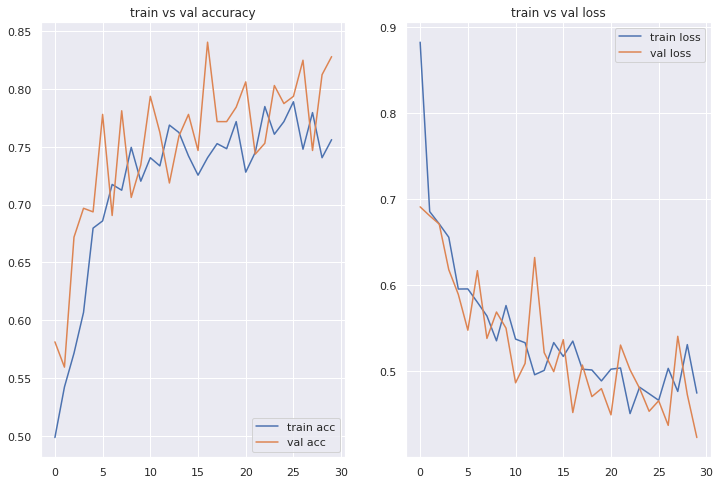

In [ ]:
#정확도
acc=history1_3.history['accuracy']
val_acc=history1_3.history['val_accuracy']

#오차 확인
loss=history1_3.history['loss']
val_loss=history1_3.history['val_loss']

epochs_range=range(30)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [ ]:
history1_4=model.fit(train_gen_list[0], 
                   validation_data=test_gen_list[0],
                   epochs=50,
                   steps_per_epoch=20,#steps_per_epoch는 한번의 epoch에서 훈련에 사용할 batch의 개수를 지정함 즉 한번 epoch할 때의 batch의 개수
                   validation_steps=10#validation_steps는 한번의 epoch이 끝날 때 테스트에 사용되는 batch의 개수 지정
                   )

Epoch 1/50
20/20 [==============================] - 7s 381ms/step - loss: 0.3527 - accuracy: 0.8391 - val_loss: 0.3354 - val_accuracy: 0.8500
Epoch 2/50
20/20 [==============================] - 7s 347ms/step - loss: 0.3423 - accuracy: 0.8453 - val_loss: 0.3717 - val_accuracy: 0.8687
Epoch 3/50
20/20 [==============================] - 7s 350ms/step - loss: 0.2951 - accuracy: 0.8781 - val_loss: 0.3700 - val_accuracy: 0.8656
Epoch 4/50
20/20 [==============================] - 7s 355ms/step - loss: 0.3539 - accuracy: 0.8578 - val_loss: 0.3334 - val_accuracy: 0.8687
Epoch 5/50
20/20 [==============================] - 7s 354ms/step - loss: 0.3412 - accuracy: 0.8547 - val_loss: 0.3456 - val_accuracy: 0.8594
Epoch 6/50
20/20 [==============================] - 9s 465ms/step - loss: 0.3062 - accuracy: 0.8636 - val_loss: 0.3684 - val_accuracy: 0.8594
Epoch 7/50
20/20 [==============================] - 9s 467ms/step - loss: 0.3459 - accuracy: 0.8475 - val_loss: 0.3066 - val_accuracy: 0.8750
Epoch 

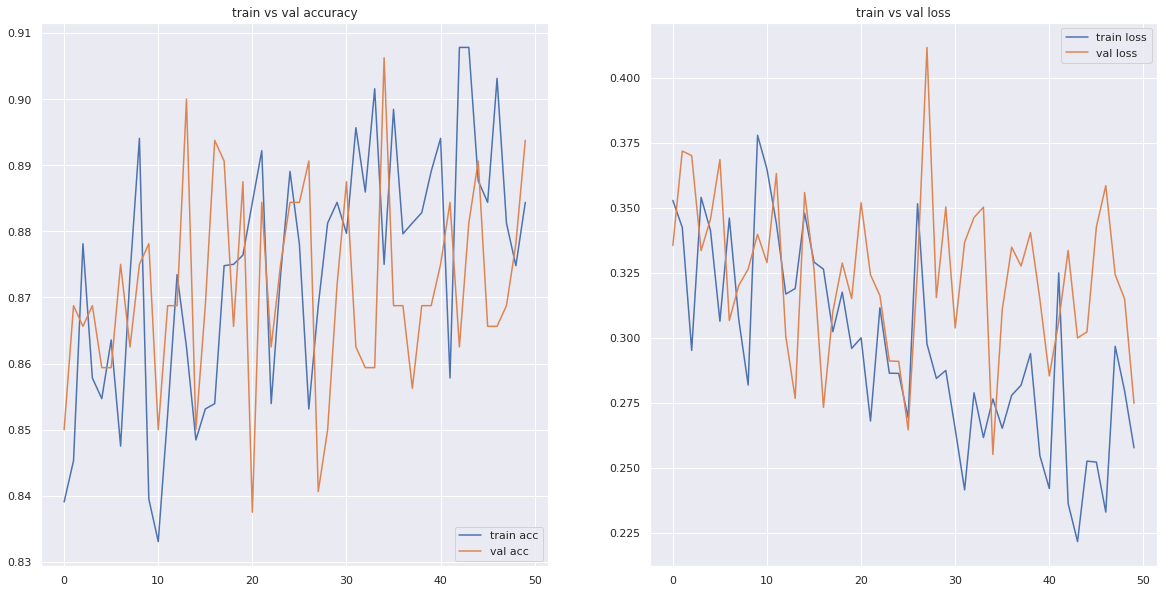

In [ ]:
#정확도
acc=history1_4.history['accuracy']
val_acc=history1_4.history['val_accuracy']

#오차 확인
loss=history1_4.history['loss']
val_loss=history1_4.history['val_loss']

epochs_range=range(50)

#accuracy 확인
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

# 테스트 이미지 분류해보기

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()


Saving 이병헌남자이미지.jfif to 이병헌남자이미지.jfif


In [40]:
for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0][0]==1:
    print(fn + " is a man")# 1. 0. 남자
  else:
    print(fn + " is a woman")#0. 1. 여자

[1. 0.]
이병헌남자이미지.jfif is a man


In [39]:
for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes)

[[1. 0.]]


In [52]:
path='/content/dataset/result/woman/face_205.jpg'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes)

[[0. 1.]]


In [ ]:
#이미지분류해보기 2

In [49]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2

def pred_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

  img_resized=cv2.resize(img,(150,150))#모델에 들어가는 이미지 크기가 224*224 이기때문에 224*244로 이미지 크기를 조정해줌
  pred=model.predict(img_resized.reshape([1,150,150,3]))#예측을 할건데 모델.predict(위에서 이미지 크기를 조정한 이미지를 넣고 reshape()로 재배치를 시킨 값을 넣는다.)
  print(pred[0])

  if(pred[0][0]>pred[0][1]):
    print('man')
  else:
    print('woman')

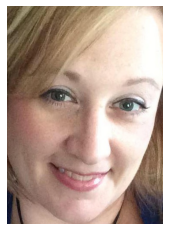

[0. 1.]
woman


In [51]:
img = cv2.imread("/content/dataset/result/woman/face_205.jpg")
pred_img(img)